In [18]:
# 그래프, 수학 기능 추가
# Add graph and math features
import pylab as py
import numpy as np
import numpy.linalg as nl
# 기호 연산 기능 추가
# Add symbolic operation capability
import sympy as sy

In [19]:
sy.init_printing()

# 전진 오일러법: 고차 상미분 방정식<br>Forward Euler Method: Higher Order ODE

## 1계 미분방정식의 예<br>An example of a first order ODE

$$
\left\{
    \begin{align}
        2 \frac{d}{dt}x(t)+ x(t)&=0 \\
        x(0)&=x_0 \\
    \end{align}
\right.
$$

위 1계 미분방정식의 경우 다음과 같이 근사해를 구할 수 있었다.<br>We could find an approximate solution for a first order ordinary differential equation as follows.

In [20]:
a_0, a_1 = 2.0, 1.0

def dx_dt(x, t):
    return - a_1 * x / a_0

In [21]:
def forward_euler(f, t_array, x_0):
    time_list = [t_array[0]]
    result_list = [x_0]

    x_i = x_0

    for k, t_i in enumerate(t_array[:-1]):
        # time step
        delta_t = t_array[k+1] - t_array[k]

        # slope
        s_i = f(x_i, t_i)

        # x[i + 1]
        x_i_plus_1 = x_i + s_i * delta_t

        time_list.append(t_array[k+1])
        result_list.append(x_i_plus_1)
        
        x_i = x_i_plus_1

    return time_list, result_list



In [22]:
# Time step interval
delta_t = 0.1

# Time array
t_sec_array = np.arange(0, 6 + delta_t*0.5, delta_t)

# Initial state
x_0 = 4.5

# *** ODE solver ***
t_01, x_01 = forward_euler(dx_dt, t_sec_array, x_0)


In [23]:
def exact(t):
    return x_0 * py.exp((-a_1 / a_0) * t)


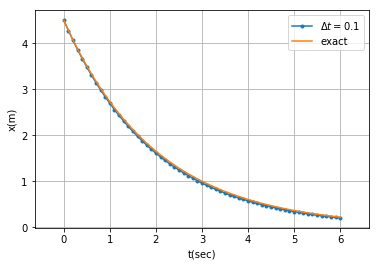

In [24]:
py.plot(t_01, x_01, '.-', label=f'$\\Delta t={delta_t}$')

# Indicate the exact solution
exact_x_array = exact(t_sec_array)
py.plot(t_sec_array, exact_x_array, label='exact')

py.axis('equal')

py.xlabel('t(sec)')
py.ylabel('x(m)')

py.legend(loc=0)
py.grid(True)


그러나 앞으로 만나게 될 미분 방정식은 더 높은 차수의 미분을 포함할 수 있다.<br>However, in the future, we may meet differential equations including higher order differentiation.

## 2계 (비선형) 상미분 방정식<br>Second order (Nonlinear) Ordinary Differential Equation

예를 들어 단진자가 어떻게 움직이는지 다음과 같이 묘사할 수 있다.<br>
For example, we can describe how a simple pendulum moves as follows.<br>
Ref : Wikipedia contributors, 'Pendulum (mathematics)', Wikipedia, The Free Encyclopedia, 2 June 2018, 13:28 UTC, <https://en.wikipedia.org/w/index.php?title=Pendulum_(mathematics)&oldid=844080803> [accessed 5 August 2018]

$$
\frac{d^2\theta}{dt^2} + \frac{g}{l}sin\theta = 0
$$

위 상미분 방정식은 $\theta$의 2계 미분과 $sin\theta$ 를 포함하고 있다.<br>The ordinary differential equation above includes a second order derivative of $\theta$ and $sin\theta$.

여기서 $sin\theta$ 는 비선형으로, 위 해당 식은 2계 비선형 상미분 방정식이다.<br>Here $sin\theta$ is nonlinear; thus the equation above is a second order nonlinear ordinary differential equation.

해당 방정식을 풀기 위해 다음과 같이 $x_0$, $x_1$ 와 같은 상태변수를 도입하자.<br>To solve the equation, let's introduce state variables $x_0$ and $x_1$ as follows.

$$
\begin{cases}
    x_0 = \theta\\
    x_1 = \frac{d\theta}{dt}  = \frac{d}{dt}x_0\\
\end{cases}
$$

방정식의 각 항을 상태변수로 다시 써 보자.<br>Let's rewrite each term of the equation using the state variables.

$$
\begin{cases}
    sin \theta = sin x_0\\
    \frac{d^2\theta}{dt^2} = \frac{d}{dt} \frac{d\theta}{dt}= \frac{d}{dt} x_1\\
\end{cases}
$$

다시 방정식에 대입해 보자.<br>Let's substitute back to the equation.

$$
\frac{dx_1}{dt} + \frac{g}{l}sinx_0 = 0 \\
\frac{dx_1}{dt} =- \frac{g}{l}sinx_0
$$

$x_0$와 $x_1$의 미분을 살펴 보자.<br>Let's take a look at the derivatives of $x_0$ and $x_1$.

$$
\begin{pmatrix}
    \frac{d}{dt}x_0\\
    \frac{d}{dt}x_1
\end{pmatrix} 
=
\begin{pmatrix}
    x_1\\
    -\frac{g}{l}sinx_0
\end{pmatrix} 
$$

이를 python 함수로 구현해 보자.<br>Let's implement this in a python function.

In [25]:
g_mpsps = 9.8
l_m = 0.3

legends = ('$\\theta(deg)$', '$\\frac{d}{dt}\\theta(deg/s)$')
ylabel = ''

# Initial state
x_0 = np.array([np.deg2rad(90), 0])

def pendulum_NL(x, t):
    """
    Parameters
    ==========
    x: array of theta and d(theta)/dt
    t: time value
    
    Return Value
    ============
    One dimensional array of dx/dt
    """
    
    return np.array([x[1], (-g_mpsps/l_m)*np.sin(x[0])])


전진 오일러법을 적용해 보자.<br>Let's apply the Forward Euler Method.

In [26]:
# Time step interval
delta_t = 0.1

# Time array
t_sec_array = np.arange(0, 6 + delta_t*0.5, delta_t)

# *** ODE solver ***
t_01, x_01 = forward_euler(pendulum_NL, t_sec_array, x_0)


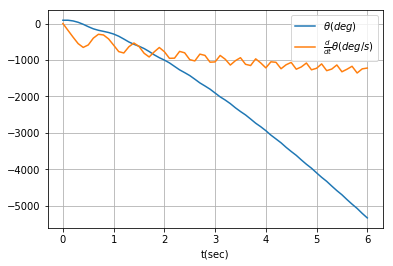

In [27]:
x_result_array = np.array(x_01).T
for label, x_result in zip(legends, x_result_array):
    py.plot(t_01, np.rad2deg(x_result), label=label)
# https://stackoverflow.com/questions/11481644/how-do-i-assign-multiple-labels-at-once-in-matplotlib

py.xlabel('t(sec)')
py.ylabel(ylabel)

py.legend(loc=0)
py.grid(True)


위 근사해는 불안정해 보인다. $\Delta t$를 줄여 보자.<br>The approximate solution looks unstable. Let's make $\Delta t$ smaller.

In [28]:
# Time step interval
delta_t = 0.001

# Time array
t_sec_array = np.arange(0, 6 + delta_t*0.5, delta_t)

# *** ODE solver ***
t_01, x_01 = forward_euler(pendulum_NL, t_sec_array, x_0)


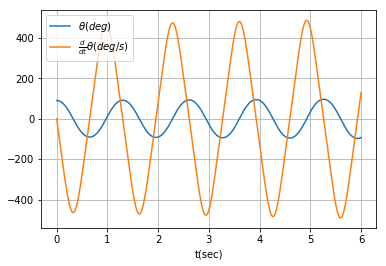

In [29]:
x_result_array = np.array(x_01).T
for label, x_result in zip(legends, x_result_array):
    py.plot(t_01, np.rad2deg(x_result), label=label)
# https://stackoverflow.com/questions/11481644/how-do-i-assign-multiple-labels-at-once-in-matplotlib

py.xlabel('t(sec)')
py.ylabel(ylabel)

py.legend(loc=0)
py.grid(True)


30cm 길이의 단진자로 시험해 보자.<br>Let's test using a 30cm simple pendulum.

## 높은 차수의 선형 상미분 방정식<br>Linear Ordinary Differential Equation of Higher Order

위 예에서는 어떻게 2차 (비선형) 상미분 방정식에 전진 오일러법을 적용하는지 살펴보았다.<br>
In the previous example, we observed how to apply forward euler method to a 2nd order (nonlinear) ordinary differential equation.

일반적으로, 우변이 0인 (모든 가능한) $n$차 선형 상미분 방정식은 다음과 같이 쓸 수 있다.<br>
In general, we can write (all possible) $n$th order linear ordinary differential equation with right side zero as follows.

$$
    a_0 \frac{d^nx}{dt^n} + a_1 \frac{d^{n-1}x}{dt^{n-1}} + a_2 \frac{d^{n-2}x}{dt^{n-2}} + \ldots + a_i  \frac{d^{n-i}x}{dt^{n-i}} + \ldots + a_{n-2} \frac{d^2x}{dt^2} + a_{n-1} \frac{dx}{dt} + a_n x = 0
$$

가장 높은 차수의 항만 남기고 모두 우변으로 옮겨 보자.<br>
Let's move everyone to the right side except the highest order term.

$$
\begin{align}
    a_0 \frac{d^nx}{dt^n} &= 
    - a_1 \frac{d^{n-1}x}{dt^{n-1}} 
    - a_2 \frac{d^{n-2}x}{dt^{n-2}} 
    - \ldots 
    - a_i  \frac{d^{n-i}x}{dt^{n-i}} 
    - \ldots 
    - a_{n-2} \frac{d^2x}{dt^2} 
    - a_{n-1} \frac{dx}{dt} 
    - a_n x \\
    \frac{d^nx}{dt^n} &= 
    - \frac{a_1}{a_0} \frac{d^{n-1}x}{dt^{n-1}} 
    - \frac{a_2}{a_0} \frac{d^{n-2}x}{dt^{n-2}} 
    - \ldots 
    - \frac{a_i}{a_0}  \frac{d^{n-i}x}{dt^{n-i}} 
    - \ldots 
    - \frac{a_{n-2}}{a_0} \frac{d^2x}{dt^2} 
    - \frac{a_{n-1}}{a_0} \frac{dx}{dt} 
    - \frac{a_n}{a_0} x    
\end{align}
$$

앞과 마찬가지로, 최고 차수인 $n$ 개의 상태변수를 도입해 보자.<br>As before, let's introduce $n$, the highest order, state variables.

$$
\mathbf{q}=
\begin{pmatrix}
    q_0 \\ q_1 \\ q_2 \\ \vdots \\ q_i \\ \vdots \\ q_{n-2} \\ q_{n-1}
\end{pmatrix}
=
\begin{pmatrix}
    x \\ \frac{d}{dt}x \\ \frac{d^2}{dt^2}x \\ \vdots \\ \frac{d^i}{dt^i}x \\ \vdots \\ \frac{d^{n-2}}{dt^{n-2}}x \\ \frac{d^{n-1}}{dt^{n-1}}x
\end{pmatrix}
$$

가장 높은 차수의 미분을 상태변수로 표시해 보자.<br>Let's indicate the highest order differentiation in the state variable form.

$$
    \frac{d^nx}{dt^n} = 
    - \frac{a_1}{a_0} q_{n-1} 
    - \frac{a_2}{a_0} q_{n-2} 
    - \ldots 
    - \frac{a_i}{a_0}  q_{n-i}
    - \ldots 
    - \frac{a_{n-2}}{a_0} q_{2} 
    - \frac{a_{n-1}}{a_0} q_{1} 
    - \frac{a_n}{a_0} q_{0}
$$

시간에 대해 $\mathbf{q}$ 를 미분해 보자.<br>Let's differentiate $\mathbf{q}$ with respect to time.

$$
\frac{d}{dt}\mathbf{q}=
\begin{pmatrix}
    \frac{d}{dt}q_0 \\ \frac{d}{dt}q_1 \\ \frac{d}{dt}q_2 \\ \vdots \\ \frac{d}{dt}q_i \\ \vdots \\ \frac{d}{dt}q_{n-2} \\ \frac{d}{dt}q_{n-1}
\end{pmatrix}
=
\begin{pmatrix}
    \frac{d}{dt}x \\ \frac{d^2}{dt^2}x  \\ \frac{d^3}{dt^3}x \\ \vdots \\ \frac{d^i}{dt^i}x \\ \vdots \\ \frac{d^{n-1}}{dt^{n-1}}x \\ \frac{d^{n}}{dt^{n}}x
\end{pmatrix}
=
\begin{pmatrix}
q_1 \\ q_2 \\ q_3 \\ \vdots \\ q_{i+1} \\ \vdots \\ q_{n-1} \\ 
- \frac{a_1}{a_0} q_{n-1} 
    - \frac{a_2}{a_0} q_{n-2} 
    - \ldots 
    - \frac{a_i}{a_0}  q_{n-i}
    - \ldots 
    - \frac{a_{n-2}}{a_0} q_{2} 
    - \frac{a_{n-1}}{a_0} q_{1} 
    - \frac{a_n}{a_0} q_{0}
\end{pmatrix}
$$

행렬 형태로 다시 쓸 수도 있다.<br>We can rewrite in a matrix form.

$n=4$인 경우를 생각해 보자.<br>Let's think about a case of $n=4$.

$$
\frac{d\mathbf{q}}{dt}
=
\begin{pmatrix}
\frac{d}{dt} q_0 \\ \frac{d}{dt} q_1 \\ \frac{d}{dt} q_2 \\ \frac{d}{dt} q_3
\end{pmatrix}
=
\begin{pmatrix}
q_1 \\ q_2 \\ q_3 \\ 
- \frac{a_4}{a_0}q_0 - \frac{a_3}{a_0}q_1 - \frac{a_2}{a_0}q_2 - \frac{a_1}{a_0}q_3
\end{pmatrix}
=
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
- \frac{a_4}{a_0} & - \frac{a_3}{a_0} & - \frac{a_2}{a_0} & - \frac{a_1}{a_0}
\end{bmatrix}
\begin{pmatrix}
q_0 \\ q_1 \\ q_2 \\ q_3
\end{pmatrix}
=
\mathbf{Aq}
$$


위 식의 의미는, $n$차 선형 상미분 방정식의 경우, $n$개의 1차 선형 상미분 방정식으로 바꾸어 풀 수 있다는 것이다.<br>
The equation above means that we can solve a $n$th order linear ordinary differential equation by converting it to a system of $n$ first order linear differential equations.

다음 예를 살펴 보자.<br>Let's think about following example.

$$
         \frac{d^4x}{dt^4} 
         + 12 \frac{d^3x}{dt^3} 
         + 54 \frac{d^2x}{dt^2} 
         + 108 \frac{dx}{dt} 
         + 80 x = 0
$$

연립 1차 선형 상미분 방정식으로는 다음과 같이 다시 쓸 수 있다.<br>We can rewrite in a system of linear ODE's as follows.

$$
\frac{d\mathbf{q}}{dt}
=
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
- 80 & - 108 & - 54 & -12
\end{bmatrix}
\begin{pmatrix}
q_0 \\ q_1 \\ q_2 \\ q_3
\end{pmatrix}
=
\mathbf{Aq}
$$


여기서 상태변수는 다음과 같다.<br>Here, state variables are as follows.

$$
\mathbf{q} = \begin{pmatrix}q_0 & q_1 & q_2 & q_3 \end{pmatrix}^T = \begin{pmatrix}x & \frac{dx}{dt} & \frac{d^2x}{dt^2} & \frac{d^3x}{dt^3} \end{pmatrix}^T
$$

python 함수 형태로도 써 보자.<br>Let's write a python function, too.

In [30]:
matrix_A = np.matrix([
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [-80, -108, -54, -12],]
)

legends = (f'$q_{k}$' for k in range(matrix_A.shape[0]))

ylabel = '$\mathbf{q}$'

def fourth_order(q, t):
    """
    Parameters
    ==========
    q: array of q_0, q_1, q_2, and q_3
    t: time value
    
    Return Value
    ============
    One dimensional array of dq/dt
    """

    q_column = np.matrix(q).T
    qdot_column = matrix_A * q_column
    
    qdot_array = np.array(qdot_column.T).flatten()
    
    return qdot_array


전진 오일러법을 적용해 보자.<br>Let's apply the Forward Euler Method.

In [31]:
# Time step interval
delta_t = 0.01

# Time array
t_sec_array = np.arange(0, 6 + delta_t*0.5, delta_t)

# Initial state
x_0 = np.array([1, 0, 0, 0])

# *** ODE solver ***
t, q_list = forward_euler(fourth_order, t_sec_array, x_0)


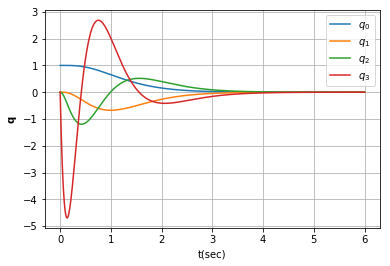

In [32]:
q_result_array = np.array(q_list).T
for label, q_result in zip(legends, q_result_array):
    py.plot(t, q_result, label=label)
# https://stackoverflow.com/questions/11481644/how-do-i-assign-multiple-labels-at-once-in-matplotlib

py.xlabel('t(sec)')
py.ylabel(ylabel)

py.legend(loc=0)
py.grid(True)


## 부록: 각 상태 변수 점에서 단진자 상태 변수 변화 방향<br>Appendix: Directions of simple pendulum state variable change at each state variable point

단진자 사례의 상태변수는 $\left(\theta, \frac{d}{dt}\theta\right)$로 2차원 좌표 평면의 각 점이 한 상태를 표시하는 것으로 생각할 수 있다. <br>State variables of the simple pendulum are $\left(\theta, \frac{d}{dt}\theta\right)$ thus we can think that each point of a 2D plane represent one possible state.

각 상태에서 상태변수의 변화의 방향 $\left(\frac{d}{dt}\theta, \frac{d^2}{dt^2}\theta \right)$ 을 표시해 보자.<br>At each state, let's present the direction of state variable change $\left(\frac{d}{dt}\theta, \frac{d^2}{dt^2}\theta \right)$.

In [33]:
def ode_slopes_2states_cartesian(func, theta_rad_list, theta_dot_rad_list, time_list):
    """
    Plot field of arrows indicating derivatives of the state
    :param func:
    :param theta_rad_list:
    :param theta_dot_rad_list:
    :param time_list:
    :return:
    """

    # cartesian coordinate
    y_rad = np.meshgrid(theta_rad_list, theta_dot_rad_list)

    # derivatives of state at each point
    y_rad_dot = func(y_rad, time_list)

    # color
    color_mesh = np.sqrt(y_rad_dot[0] * y_rad_dot[0] + y_rad_dot[1] * y_rad_dot[1])

    py.figure(figsize=(18, 18))
    py.axis('equal')
    py.quiver(py.rad2deg(y_rad[0]), py.rad2deg(y_rad[1]), py.rad2deg(y_rad_dot[0]), py.rad2deg(y_rad_dot[1]), color_mesh, angles='xy')
    l, r, b, t = py.axis()
    x_span, y2_mesh = r - l, t - b
    py.axis([l - 0.05 * x_span, r + 0.05 * x_span, b - 0.05 * y2_mesh, t + 0.05 * y2_mesh])
    py.grid()


Text(0.5,1,'Simple pendulum')

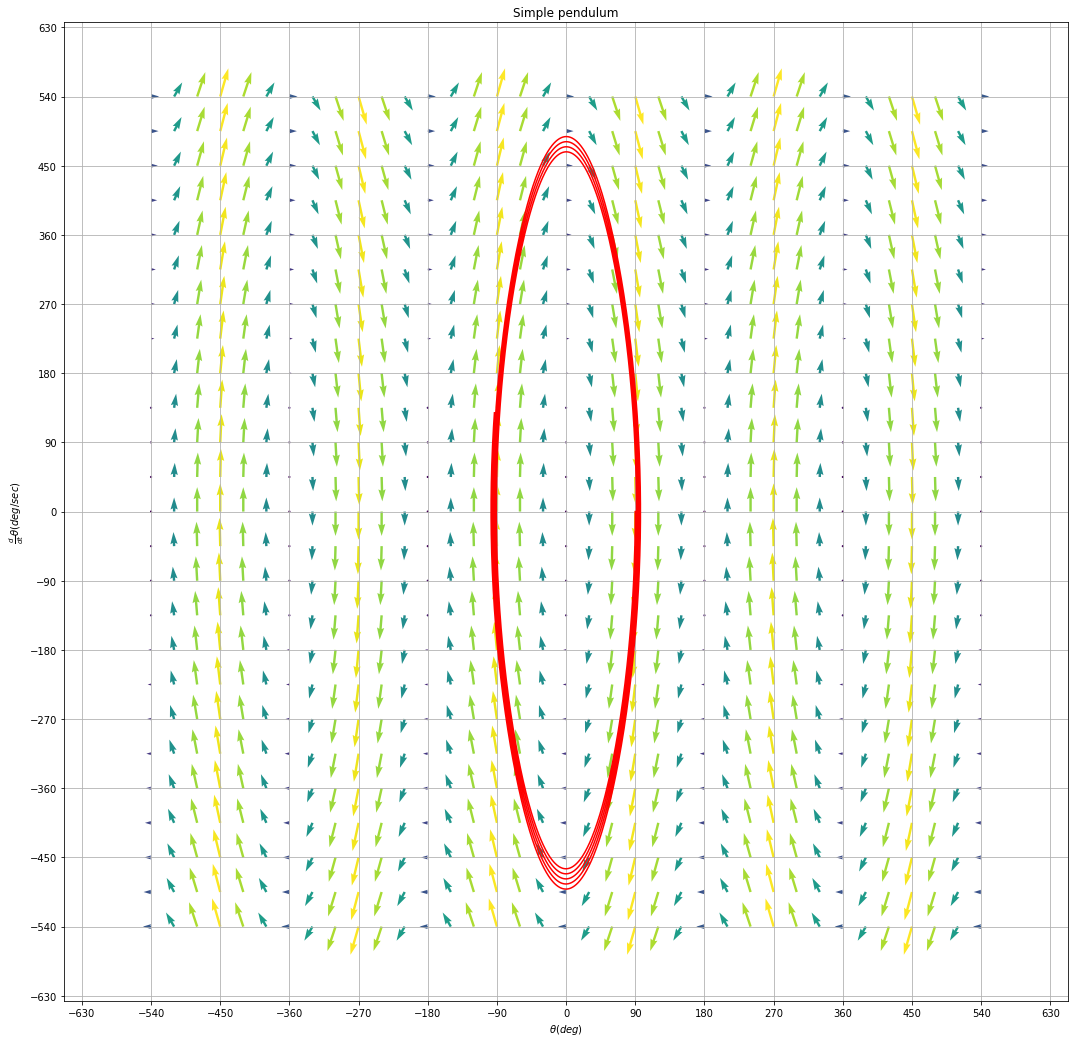

In [34]:
time_list = []

# list of theta
theta_rad_list = np.deg2rad(np.arange(-540, 540+1, 30))

# list of theta_dot
theta_dot_rad_list = np.deg2rad(np.arange(-540, 540+1, 45))
ode_slopes_2states_cartesian(pendulum_NL, theta_rad_list, theta_dot_rad_list, time_list)

py.plot(py.rad2deg(x_result_array[0]), py.rad2deg(x_result_array[1]), 'r-')

ax = py.gca()

xlims = py.xlim()
# http://matplotlib.1069221.n5.nabble.com/How-do-I-set-grid-spacing-td9968.html
ax.set_xticks(np.hstack([np.arange(0, xlims[1]+1, 90), np.arange(-90, xlims[0]-1, -90)]))

ylims = py.ylim()
# http://matplotlib.1069221.n5.nabble.com/How-do-I-set-grid-spacing-td9968.html
ax.set_yticks(np.hstack([np.arange(0, ylims[1]+1, 90), np.arange(-90, ylims[0]-1, -90)]))

py.xlabel('$\\theta(deg)$')
py.ylabel('$\\frac{d}{dt}\\theta(deg/sec)$')
py.title('Simple pendulum')


In [ ]:
def ex50_15_02(q,t):
    ---
    Parameters
    q: